# Assignment - 4 

# Question - 2

# Import necessary libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Import data

In [2]:
salary_data = pd.read_csv(r'D:\Downloads\salary_data.csv')
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Data understanding

In [3]:
salary_data.shape

(30, 2)

In [4]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [5]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## Linearity test

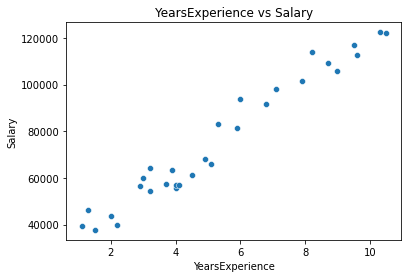

In [7]:
sns.scatterplot( x = 'YearsExperience' , y = 'Salary' , data = salary_data)
plt.title('YearsExperience vs Salary')
plt.show()

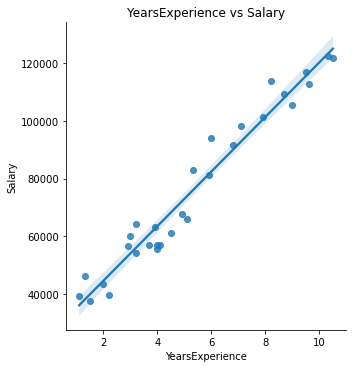

In [8]:
sns.lmplot( x = 'YearsExperience' , y = 'Salary' , data = salary_data)
plt.title('YearsExperience vs Salary')
plt.show()

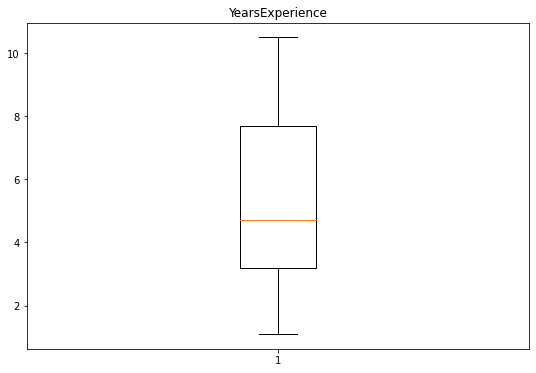

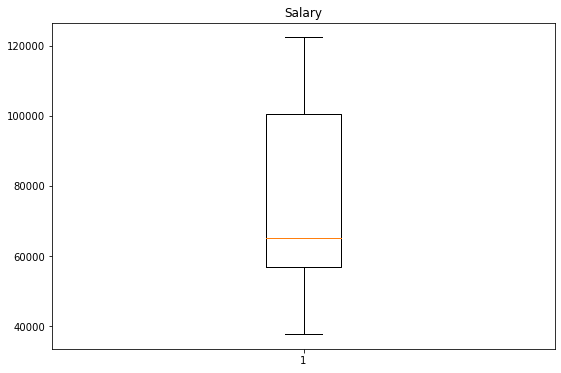

In [9]:
plt.figure(figsize=(9,6))
plt.boxplot(salary_data['YearsExperience'])
plt.title('YearsExperience')
plt.show()
plt.figure(figsize=(9,6))
plt.boxplot(salary_data['Salary']) 
plt.title("Salary")
plt.show()

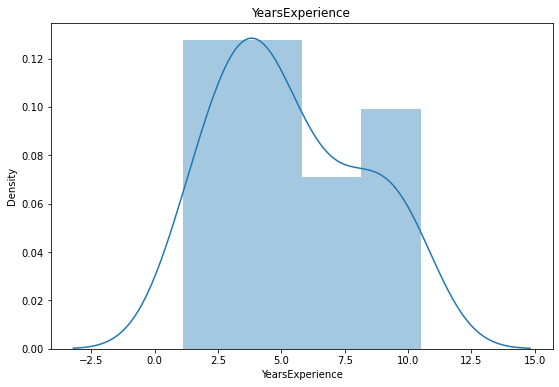

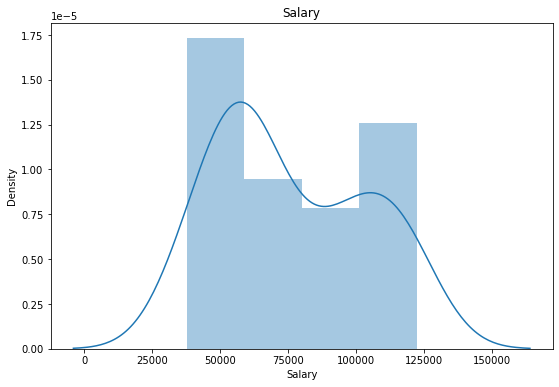

In [10]:
plt.figure(figsize=(9,6))
sns.distplot(salary_data['YearsExperience'])
plt.title('YearsExperience')
plt.show()
plt.figure(figsize=(9,6))
sns.distplot(salary_data['Salary'])
plt.title('Salary')
plt.show()

In [11]:
salary_data['YearsExperience'].skew()

0.37956024064804106

In [12]:
salary_data['Salary'].skew()

0.35411967922959153

It is following linearity

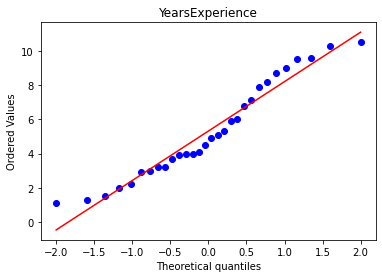

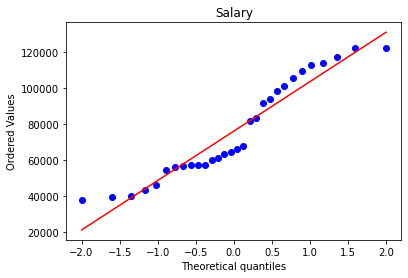

In [13]:
stats.probplot(x = salary_data['YearsExperience'] , dist = 'norm' , plot = plt)
plt.title('YearsExperience')
plt.show()
stats.probplot(x = salary_data['Salary'] , dist = 'norm' , plot = plt)
plt.title('Salary')
plt.show()

In [14]:
salary_data.corr() 

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


The correlation between years experience and salary is higher then 0.9

In [15]:
x = salary_data.drop(labels='Salary' , axis= 1)
y = salary_data[['Salary']]

In [16]:
salary_data1 = smf.ols(formula = ' y ~ x ' , data = salary_data).fit()

In [17]:
pred_salary = salary_data1.predict(x)

In [18]:
pred_salary

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [19]:
salary_data['pred_salary']=pred_salary

In [20]:
salary_data

,YearsExperience,Salary,pred_salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


# Log transformation

In [22]:
log_salarydata = np.log(salary_data['YearsExperience'])
log_salarydata

0     0.095310
1     0.262364
2     0.405465
3     0.693147
4     0.788457
5     1.064711
6     1.098612
7     1.163151
8     1.163151
9     1.308333
10    1.360977
11    1.386294
12    1.386294
13    1.410987
14    1.504077
15    1.589235
16    1.629241
17    1.667707
18    1.774952
19    1.791759
20    1.916923
21    1.960095
22    2.066863
23    2.104134
24    2.163323
25    2.197225
26    2.251292
27    2.261763
28    2.332144
29    2.351375
Name: YearsExperience, dtype: float64

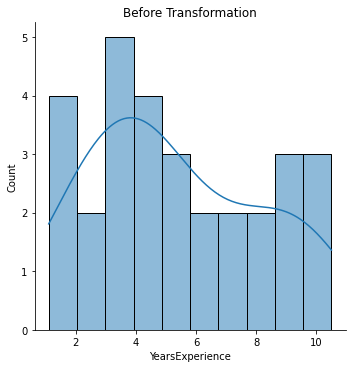

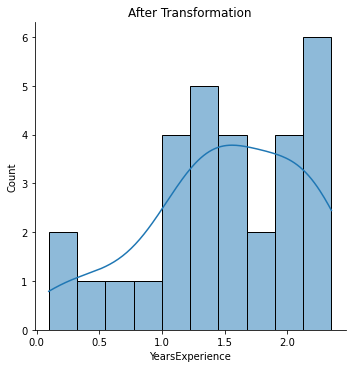

In [23]:
sns.displot(salary_data['YearsExperience'],bins = 10,kde= True)
plt.title('Before Transformation')
sns.displot(log_salarydata,bins = 10,kde= True)
plt.title('After Transformation')
plt.show() 

In [25]:
log_salarydata1 = smf.ols(formula='y ~ log_salarydata' , data = salary_data).fit()

In [26]:
log_salarydata1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           3.25e-13
Time:                        22:05:30   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_salarydata  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Square Root Transformation

In [27]:
sqrt_salarydata = np.sqrt(salary_data['YearsExperience'])
sqrt_salarydata

0     1.048809
1     1.140175
2     1.224745
3     1.414214
4     1.483240
5     1.702939
6     1.732051
7     1.788854
8     1.788854
9     1.923538
10    1.974842
11    2.000000
12    2.000000
13    2.024846
14    2.121320
15    2.213594
16    2.258318
17    2.302173
18    2.428992
19    2.449490
20    2.607681
21    2.664583
22    2.810694
23    2.863564
24    2.949576
25    3.000000
26    3.082207
27    3.098387
28    3.209361
29    3.240370
Name: YearsExperience, dtype: float64

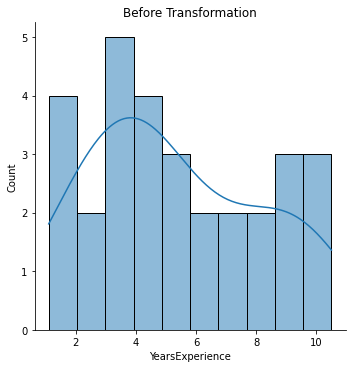

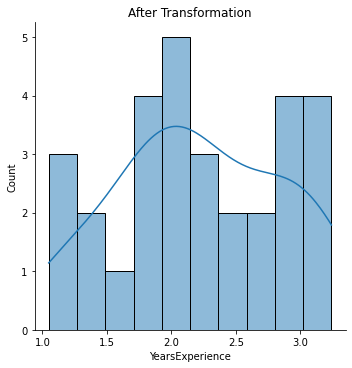

In [28]:
sns.displot(salary_data['YearsExperience'],bins = 10,kde= True)
plt.title('Before Transformation')
sns.displot(sqrt_salarydata,bins = 10,kde= True)
plt.title('After Transformation')
plt.show()

In [29]:
sqrt_salarydata = smf.ols(formula='y ~ sqrt_salarydata' , data = salary_data).fit()

In [30]:
sqrt_salarydata.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           8.57e-18
Time:                        22:14:13   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
sqrt_salarydata   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Cube Root Transformation

In [31]:
cbrt_salarydata = np.cbrt(salary_data['YearsExperience'])
cbrt_salarydata

0     1.032280
1     1.091393
2     1.144714
3     1.259921
4     1.300591
5     1.426043
6     1.442250
7     1.473613
8     1.473613
9     1.546680
10    1.574061
11    1.587401
12    1.587401
13    1.600521
14    1.650964
15    1.698499
16    1.721301
17    1.743513
18    1.806969
19    1.817121
20    1.894536
21    1.921997
22    1.991632
23    2.016530
24    2.056710
25    2.080084
26    2.117912
27    2.125317
28    2.175767
29    2.189760
Name: YearsExperience, dtype: float64

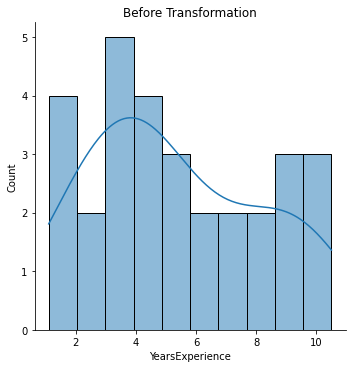

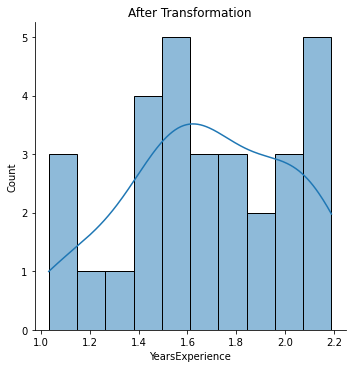

In [32]:
sns.displot(salary_data['YearsExperience'],bins = 10,kde= True)
plt.title('Before Transformation')
sns.displot(cbrt_salarydata,bins = 10,kde= True)
plt.title('After Transformation')
plt.show() 

In [33]:
cbrt_salarydata1 = smf.ols(formula='y ~ cbrt_salarydata' , data = salary_data).fit()

In [34]:
cbrt_salarydata1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     287.7
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           2.91e-16
Time:                        22:17:23   Log-Likelihood:                -312.29
No. Observations:                  30   AIC:                             628.6
Df Residuals:                      28   BIC:                             631.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5.705e+04   7989.534     -7.141      0.000   -7.34e+04   -4.07e+04
cbrt_salarydata  7.896e+04   4655.395     16.962      0.000    6.94e+04    8.85e+04
==============================================================================
Omnibus:                        0.462   Durbin-Watson:                   0.811
Prob(Omnibus):                  0.794   Jarque-Bera (JB):                0.575
Skew:                           0.047   Prob(JB):                        0.750
Kurtosis:                       2.328   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""